## Example Overview


## Model Description
Below we create a child `ModPiece` class that solves the 1D elliptic equation given by 
$$
\begin{aligned}
-\frac{\partial}{\partial x}\left[ k(x) \frac{\partial h}{\partial x}\right] &= f(x)\\
h(0) &= 0\\
\left. \frac{\partial h}{\partial x}\right|_{x=1} &= 0,
\end{aligned}
$$
where $h(x)$ is the solution (hydraulic head in groundwater applications), $k(x)$ is a conductivity parameter (or diffusion coefficient depending on the application), and $f(x)$ is a source term.  We assume $x\in\Omega$, where $\Omega=[0,1]$.  

We will employ the finite element method to discretize the PDE.  In particular, we consider piecewise constant conductivity fields in $H^0(\Omega)$ and piecewise linear solutions in $H^1(\Omega)$.    For a discretization with $N$ nodes, we can therefore represent the conductivity field $k(x)$ with $N-1$ degrees of freedom and the solution $h(x)$ with $N$ degrees of freedom.



### Gradient
Consider an arbitrary objective functional $J(h) : H^1(\Omega) \rightarrow \mathbb{R}$ and the constrained optimization problem 
$$
\begin{aligned}
\min_{h,k}\quad & J(h)\\
\text{s.t.}\quad & \frac{\partial}{\partial x}\left[ k(x) \frac{\partial h}{\partial x}\right] + f(x) = 0.
\end{aligned}
$$ 

With a Lagrange multiplier $p\in\mathcal{H}^1(\Omega)$ allows us to form the Lagrangian $\mathcal{L}(h,k,p)$ associated with this optimization problem. In particular,
$$
\mathcal{L}(h,k,p) = J(h) - \int_\Omega p \frac{\partial}{\partial x}\left[ k \frac{\partial h}{\partial x}\right] dx - \int_\Omega p f dx.
$$ 
Note that the explicit dependence of $h$, $k$, and $p$ on $x$ has been dropped for clarity.    Using integration by parts, we can ``move'' the derivative on $k \frac{\partial h}{\partial x}$ to a derivative on $p$, resulting in 
$$
\mathcal{L}(h,k,p) = J(h) - \left.\left(p k \frac{\partial h}{\partial x}\right)\right|_{0}^{1} + \int_\Omega k \frac{\partial p}{\partial x} \frac{\partial h}{\partial x} dx - \int_\Omega p f dx.
$$
Recall that $p(0)=0$ because of the Dirichlet condition at $x=0$.  Combined with the boundary condition $\partial h / \partial dx = 0$ at $x=1$, the Lagrangian can be simplified to 
$$
\mathcal{L}(h,k,p) = J(h) + \int_\Omega k \frac{\partial p}{\partial x} \frac{\partial h}{\partial x} dx - \int_\Omega p f dx.
$$

We now consider the first variations of the Lagrangian with respect to each input.   Recall that the first variation $G_m(m)(\tilde{m})$ is the directional derivative of the functional $G$ in the direction $\tilde{m}$ and is defined as 
$$
G_m(m)(\tilde{m}) = \left. \frac{\partial}{\partial \epsilon} G(m+\epsilon\tilde{m}) \right|_{\epsilon=0},
$$
where $\epsilon\in\mathbb{R}$ is a scalar step size.

Using this definition, the first variation of $\mathcal{L}$ with respect to $h$ is given by
$$
\begin{aligned}
\mathcal{L}_h(h,k,p)(\tilde{h}) &= \left. \frac{\partial}{\partial \epsilon} \mathcal{L}(h+\epsilon \tilde{h},k,p) \right|_{\epsilon=0}\\
&= \left. \frac{\partial}{\partial \epsilon}\left[J(h+\epsilon \tilde{h}) +\int_\Omega k \frac{\partial p}{\partial x} \frac{\partial (h+\epsilon\tilde{h})}{\partial x} dx - \int_\Omega p f dx\right] \right|_{\epsilon=0}\\
&= J_h(h)(\tilde{h}) + \int_\Omega k \frac{\partial p}{\partial x}\frac{\partial \tilde{h}}{\partial x} dx.
\end{aligned}
$$

Similarly, the first variation with respect $p$ is 
$$
\begin{aligned}
\mathcal{L}_p(h,k,p)(\tilde{p}) &= \left. \frac{\partial}{\partial \epsilon} \mathcal{L}(h,k,p+\epsilon \tilde{p}) \right|_{\epsilon=0}\\
&= \left. \frac{\partial}{\partial \epsilon}\left[J(h) + \int_\Omega k \frac{\partial (p+\epsilon \tilde{p})}{\partial x} \frac{\partial h}{\partial x} dx - \int_\Omega (p+\epsilon \tilde{p}) f dx\right] \right|_{\epsilon=0}\\
&= \int_\Omega k \frac{\partial \tilde{p}}{\partial x}\frac{\partial h}{\partial x} dx - \int_\Omega \tilde{p} f dx.
\end{aligned}
$$

And finally, the first variation with respect to $k$ is given by
$$
\begin{aligned}
\mathcal{L}_k(h,k,p)(\tilde{k}) &= \left. \frac{\partial}{\partial \epsilon} \mathcal{L}(h,k+\epsilon \tilde{k},p) \right|_{\epsilon=0}\\
&= \left. \frac{\partial}{\partial \epsilon} \left[ J(h) + \int_\Omega (k+\epsilon\tilde{k}) \frac{\partial p}{\partial x} \frac{\partial h}{\partial x} dx - \int_\Omega p f dx\right] \right|_{\epsilon=0}\\
&=\int_\Omega \tilde{k}\frac{\partial h}{\partial x} \frac{\partial p}{\partial x} dx
\end{aligned}
$$

The solution of the optimization problem is given by the points $(h,k,p)$ where all of these first variations are zero for any admissable directions $\tilde{h}$, $\tilde{p}$, and $\tilde{k}$.  Solving  $\mathcal{L}_p(h,k,p)(\tilde{p})=0$ for all $\tilde{p}$ yields the weak form of the original elliptic PDE -- the ``forward equation.''  Solving $\mathcal{L}_h(h,k,p)(\tilde{h})$ for all $\tilde{h}$ results in the weak form of the adjoint equation.   Finally, the constraint $\mathcal{L}_k(h,k,p)(\tilde{k})=0$ provides a definition of the gradient using the solutions of the forward and adjoint equations.   

To see this last point, consider the relationship between the gradient and directional derivative of a function $g(y)$ mapping $\mathbb{R}^N\rightarrow\mathbb{R}$.   The directional derivative in a unit direction $\tilde{y}$ is $\tilde{y}\cdot \nabla_y g$ -- it is the inner product of the gradient and the direction $\tilde{y}$.  Now consider the expression for the first variation $\mathcal{L}_k(h,k,p)(\tilde{k})$, which is just the directional derivative in direction $\tilde{k}$.  The integral $\int_\Omega \tilde{k}\frac{\partial h}{\partial x} \frac{\partial p}{\partial x} dx$ is just an inner product of the direction $\tilde{k}$ with $D_kJ = \frac{\partial h}{\partial x} \frac{\partial p}{\partial x}$.   Using this as an analogy with $\nabla_y g$, we see that $D_kJ(x)$ serves as the functional gradient. 



### Hessian action
It is also possible to use adjoint methods to derive the action of the Hessian linear operator.   Recall that $\mathcal{L}_k(h,k,p)(\tilde{k})$ is a scalar quantity that, when $\mathcal{L}_p(h,k,p)(\tilde{p})=0$ for all $\tilde{p}$ and $\mathcal{L}_h(h,k,p)(\tilde{h})=0$ for all $\tilde{h}$, represents the directional derivative of the Lagrangian in direction $\tilde{k}$.   To characterize the Hessian, we now want to characterize the change in the directional derivative $\mathcal{L}_k(h,k,p)(\tilde{k})$ when $k$ is perturbed in another direction.

To characterize the second directional derivative, we can form another (meta-)Lagrangian using $\mathcal{L}_k(h,k,p)(\tilde{k})$ and the constraints $\mathcal{L}_p(h,k,p)(\tilde{p})=0$ and $\mathcal{L}_h(h,k,p)(\tilde{h})=0$.  The strong form of these constraints is given by
$$
\begin{aligned}
-\frac{\partial}{\partial x}\left[ k(x) \frac{\partial h}{\partial x}\right] &= f(x)\\
h(0) &= 0\\
\left. \frac{\partial h}{\partial x}\right|_{x=1} &= 0,
\end{aligned}
$$
and 
$$
\begin{aligned}
-\frac{\partial}{\partial x}\left[ k(x) \frac{\partial p}{\partial x}\right] &= D_hJ(x)\\
p(0) &= 0\\
\left. \frac{\partial p}{\partial x} \right|_{x=1} &= 0,
\end{aligned}
$$

In addition to introducing two additional Lagrange multipliers $\hat{p}$ and $\hat{h}$, we will also introduce a new function $s=D_hJ(h)$ to represent the sensitivity of the objective functional $J(h)$ with respect to $h$.  Notice that we will not directly consider second variations of $J$.  Instead, we independently consider the action of Hessian on functions $\bar{k}$ and $\bar{s}$, which is what MUQ will need to propagate second derivative information through a composition of model components.

Using $\hat{p}$, $\hat{h}$, and $s$, the meta-Lagrangian $\mathcal{L}^H$ then takes the form
$$
\begin{aligned}
\mathcal{L}^H(h,k,p,\hat{h},\hat{p}, s; \tilde{k}) &= \int_\Omega \tilde{k}\frac{\partial h}{\partial x} \frac{\partial p}{\partial x} dx - \int_\Omega \hat{p} \left( \frac{\partial}{\partial x}\left[ k \frac{\partial h}{\partial x}\right] + f\right) dx - \int_\Omega \hat{h}\left(\frac{\partial}{\partial x}\left[ k \frac{\partial p}{\partial x}\right] + s \right) dx \\
&=  \int_\Omega \tilde{k}\frac{\partial h}{\partial x} \frac{\partial p}{\partial x} dx + \int_\Omega k \frac{\partial \hat{p}}{\partial x}\frac{\partial h}{\partial x} dx - \int_\Omega \hat{p} f dx + \int_\Omega k \frac{\partial \hat{h}}{\partial x}\frac{\partial p}{\partial x} dx - \int_\Omega \hat{h} s dx
\end{aligned}
$$
Placing the $\tilde{k}$ after the semicolon in the arguments to  $\mathcal{L}^H$ is meant to indicate that the direction $\tilde{k}$ is a parameter defining the direction in which the first derivative is taken and is not an argument that needs to be considered when taking first variations.

The first variation of this meta-Lagrangian with respect to $h$ is 
$$
\begin{aligned}
\mathcal{L}_{h}^H(h,k,p,\hat{h},\hat{p}, s; \tilde{k})(\bar{h}) & = \left. \frac{\partial}{\partial \epsilon} \mathcal{L}^H(h+\epsilon\bar{h},k,p,\hat{h},\hat{p}, s; \tilde{k}) \right|_{\epsilon=0}\\
&= \left. \frac{\partial}{\partial \epsilon} \left( \int_\Omega \tilde{k}\frac{\partial (h+\epsilon\bar{h})}{\partial x} \frac{\partial p}{\partial x} dx + \int_\Omega k \frac{\partial \hat{p}}{\partial x}\frac{\partial (h+\epsilon\bar{h})}{\partial x} dx - \int_\Omega \hat{p} f dx + \int_\Omega k \frac{\partial \hat{h}}{\partial x}\frac{\partial p}{\partial x} dx - \int_\Omega \hat{h}\, s dx \right)\right|_{\epsilon=0} \\
&= \int_\Omega \tilde{k}\frac{\partial \bar{h}}{\partial x} \frac{\partial p}{\partial x} dx + \int_\Omega k \frac{\partial \hat{p}}{\partial x}\frac{\partial \bar{h}}{\partial x} dx
\end{aligned}
$$

The first variation with respect to $p$
$$
\begin{aligned}
\mathcal{L}_{p}^H(h,k,p,\hat{h},\hat{p}, s; \tilde{k})(\bar{p}) & = \left. \frac{\partial}{\partial \epsilon} \mathcal{L}^H(h,k,p+\epsilon\bar{p},\hat{h},\hat{p}, s; \tilde{k}) \right|_{\epsilon=0}\\
& =  \left. \frac{\partial}{\partial \epsilon} \left( \int_\Omega \tilde{k}\frac{\partial h}{\partial x} \frac{\partial (p+\epsilon\bar{p})}{\partial x} dx + \int_\Omega k \frac{\partial \hat{p}}{\partial x}\frac{\partial h}{\partial x} dx - \int_\Omega \hat{p} f dx + \int_\Omega k \frac{\partial \hat{h}}{\partial x}\frac{\partial (p+\epsilon\bar{p})}{\partial x} dx \right)\right|_{\epsilon=0}\\
& = \int_\Omega \tilde{k}\frac{\partial h}{\partial x} \frac{\partial \bar{p}}{\partial x} dx + \int_\Omega k \frac{\partial \hat{h}}{\partial x}\frac{\partial \bar{p}}{\partial x} dx 
\end{aligned}
$$

The first variation with respect to $k$ is
$$
\begin{aligned}
\mathcal{L}_{k}^H(h,k,p,\hat{h}, \hat{p}, s; \tilde{k})(\bar{k}) &= \left. \frac{\partial}{\partial \epsilon} \mathcal{L}^H(h,k+\epsilon \bar{k},p,\hat{h},\hat{p},s; \tilde{k}) \right|_{\epsilon=0}\\
&= \left. \frac{\partial}{\partial \epsilon}\left( \int_\Omega \tilde{k}\frac{\partial h}{\partial x} \frac{\partial p}{\partial x} dx + \int_\Omega (k+\epsilon \bar{k}) \frac{\partial \hat{p}}{\partial x}\frac{\partial h}{\partial x} dx - \int_\Omega \hat{p} f dx + \int_\Omega (k+\epsilon\bar{k}) \frac{\partial \hat{h}}{\partial x}\frac{\partial p}{\partial x} dx - \int_\Omega \hat{h} D_hJ dx \right) \right|_{\epsilon=0} \\
&= \int_\Omega \bar{k} \frac{\partial \hat{p}}{\partial x}\frac{\partial h}{\partial x} dx +\int_\Omega\bar{k} \frac{\partial \hat{h}}{\partial x} \frac{\partial p}{\partial x} dx
\end{aligned}
$$


## Imports

In [1]:
import muq.Modeling as mm

import numpy as np

import scipy.sparse as sp
import scipy.sparse.linalg as spla

import matplotlib.pyplot as plt


## Class Definition

In [2]:
class DiffusionEquation(mm.PyModPiece):
    """
    This class solves the 1D elliptic PDE of the form
    $$
    -\frac{\partial}{\partial x}\cdot(K(x) \frac{\partial h}{\partial x}) = f(x).
    $$
    over $x\in[0,1]$ with boundary conditions $h(0)=0$ and
    $\partial h/\partial x =0$ at $x=1$.  This equation is a basic model of steady
    state fluid flow in a porous media, where $h(x)$ is the hydraulic head, $K(x)$
    is the hydraulic conductivity, and $f(x)$ is the recharge.

    This ModPiece uses linear finite elements on a uniform grid. There is a single input,
    the conductivity $K(x)$, which is represented as piecewise constant within each
    of the $N$ cells.   There is a single output of this ModPiece: the head $h(x)$ at the
    $N+1$ nodes in the discretization.

    """

    def __init__(self, sourceTerm):
        super(DiffusionEquation,self).__init__([sourceTerm.shape[0]],   # inputSizes  (one for each cell)
                                               [sourceTerm.shape[0]+1]) # outputSizes (one for each node)
        
        self.numCells = sourceTerm.shape[0]
        self.numNodes = self.numCells+1
        self.source = sourceTerm

        self.xs = np.linspace(0,1,self.numNodes) # Assumes domain is [0,1]
        self.dx = self.xs[1]-self.xs[0] 
        
        self.rhs = self.BuildRhs(self.source)
        
        #self.massMat = self.BuildMassMatrix()
        
        
    def EvaluateImpl(self, inputs):
        """ Constructs the stiffness matrix and solves the resulting linear system.

            INPUTS:
                inputs: A list of vector-valued inputs.  Here, inputs has two
                        components. The first component contains a vector of
                        conductivity values for each cell and the second contains
                        recharge values for each cell.

            RETURNS:
                This function returns nothing.  It stores the result in the private
                ModPiece::outputs list that is then returned by the `Evaluate` function.
        """

        condVals = inputs[0]

        # Build the stiffness matrix and right hand side
        K = self.BuildStiffness(condVals)

        # Solve the sparse linear system
        sol = spla.spsolve(K,self.rhs)

        # Set the output list using the solution
        self.outputs = [sol]

    def GradientImpl(self, outWrt, inWrt, inputs, sensitivity):
        """ Given the gradient of some objective function to the output of this
            ModPiece, this function computes one step of the chain rule to provide
            the gradient with respect to one of the inputs of the model.  The
            gradient with respect to the conductivity field by solving the forward
            model, solving the adjoint system, and then combining the results to
            obtain the gradient.

            INPUTS:
                outWrt: For a model with multiple outputs, this would be the index
                        of the output list that corresponds to the sensitivity vector.
                        Since this ModPiece only has one output, the outWrt argument
                        is not used in the GradientImpl function.

                inWrt: Specifies the index of the input for which we want to compute
                       the gradient.  If inWrt==0, then the gradient with respect
                       to the conductivity is returned.  If inWrt==1, the gradient
                       with respect to the recharge is returned.

                inputs: A list of vector-valued inputs.  Here, inputs has two
                        components. The first component contains a vector of
                        conductivity values for each cell and the second contains
                        recharge values for each cell.

                sensitivity: A vector containing the gradient of some function
                             with respect to the output of this ModPiece.

            RETURNS:
                This function returns nothing.  It stores the result in the private
                ModPiece::gradient variable that is then returned by the `Gradient` function.

        """
        condVals = inputs[0]

        # Construct the adjoint system
        K = self.BuildStiffness(condVals)
        adjRhs = self.BuildAdjointRhs(sensitivity)
        
        # Solve the adjoint system
        sol = spla.spsolve(K,self.rhs)
        adjSol = spla.spsolve(K.T,adjRhs)

        # Compute the gradient from the adjoint solution
        dhdx = (sol[1:] - sol[:-1])/self.dx   # derivative of forward solution, which is constant in each cell
        dpdx = (adjSol[1:] - adjSol[:-1])/self.dx # derivative of adjoint solution, which is constant in each cell
        
        self.gradient = self.dx * dhdx * dpdx 
    
    def ApplyHessianImpl(self, outWrt, inWrt1, inWrt2, inputs, sensitivity, vec):
    
        condVals = inputs[0]
        
        # Build the stiffness matrix
        K = self.BuildStiffness(condVals)
        
        # Solve the forward system
        sol = spla.spsolve(K,self.rhs)

        if((inWrt1==0)&(inWrt2==0)):
                        
            # Solve the adjoint system
            adjRhs = self.BuildAdjointRhs(sensitivity)
            adjSol = spla.spsolve(K.T,adjRhs) # Because K is symmetric

            # Solve the incremental forward system
            incrForRhs = self.BuildIncrementalRhs(sol, vec)
            incrForSol = spla.spsolve(K,incrForRhs)
            
            # Solve the incremental adjoint system
            incrAdjRhs = self.BuildIncrementalRhs(adjSol,vec)
            incrAdjSol = spla.spsolve(K.T,incrAdjRhs) # Because K is symmetric
            
            # Construct the Hessian action
            solDeriv = (sol[1:]-sol[:-1])/self.dx
            adjDeriv = (adjSol[1:]-adjSol[:-1])/self.dx
            incrForDeriv = (incrForSol[1:]-incrForSol[:-1])/self.dx
            incrAdjDeriv = (incrAdjSol[1:]-incrAdjSol[:-1])/self.dx
            
            self.hessAction = (incrAdjDeriv * solDeriv + incrForDeriv * adjDeriv)#*2.
            
        # Compute the action of a mixed Hessian
        elif(((inWrt1==0)&(inWrt2==1))|((inWrt1==1)&(inWrt2==0))):
            
            temp = spla.spsolve(K.T, vec)
            dhdx = (sol[1:] - sol[:-1])/self.dx   # derivative of forward solution, which is constant in each cell
            dtempdx = (temp[1:] - temp[:-1])/self.dx # derivative of adjoint solution, which is constant in each cell
            
            self.hessAction = -self.dx * dhdx * dtempdx 
        
        else: 
            assert(False)

    def BuildStiffness(self, condVals):
        """ Constructs the stiffness matrix for the conductivity defined within each cell. """

        rows = []
        cols = []
        vals = []
        
       
        # Left Dirichlet BC
        rows.append(0)
        cols.append(0)
        vals.append(1e10) # Trick to approximately enforce Dirichlet BC at x=0 while keeping matrix symmetric

        # Integration over each cell
        for cellInd in range(self.numCells):
            leftNode = cellInd
            rightNode = cellInd+1
            
            rows.append(leftNode)
            cols.append(rightNode)
            vals.append(-condVals[cellInd]/self.dx)
            
            rows.append(rightNode)
            cols.append(leftNode)
            vals.append(-condVals[cellInd]/self.dx)
            
            rows.append(rightNode)
            cols.append(rightNode)
            vals.append(condVals[cellInd]/self.dx)
            
            rows.append(leftNode)
            cols.append(leftNode)
            vals.append(condVals[cellInd]/self.dx)

        return sp.csr_matrix((vals,(rows,cols)), shape=(self.numNodes, self.numNodes))
    
    def BuildRhs(self, recharge):
        """ Constructs the right hand side vector. """

        rhs = np.zeros((self.numNodes,))

        rhs[1:-1] = 0.5*self.dx*(recharge[0:-1] + recharge[1:])
        rhs[-1] = 0.5*self.dx*recharge[-1]
        return rhs

    def BuildAdjointRhs(self,sensitivity):
        rhs = -1.0*sensitivity #copy.deepcopy(sensitivity)
        rhs[0] = 0.0
        return rhs

    def BuildIncrementalRhs(self, sol, khat):
        # The derivative of the solution in each cell
        solGrad = (sol[1:]-sol[:-1])/self.dx
        rhs = np.zeros((self.numNodes,))
        
        for cellInd in range(self.numCells):
            leftNode = cellInd
            rightNode = cellInd+1
            
            rhs[leftNode] -= self.dx*khat[cellInd]*solGrad[cellInd]
            rhs[rightNode] += self.dx*khat[cellInd]*solGrad[cellInd]
            
        rhs[0]=0.0
        return -rhs
    

In [3]:
## Construct Model

In [4]:
numCells = 200
nodeXs = np.linspace(0,1,numCells+1)
cellXs = 0.5*(nodeXs[1:]+nodeXs[0:-1])

recharge = np.ones(numCells)

mod = DiffusionEquation(recharge)


In [5]:
mean = np.zeros(numCells+1)
objective = mm.Gaussian(mean).AsDensity()

In [6]:
## Evaluate Model

In [7]:
K = np.exp(1.0*np.cos(20.0*cellXs))

h = mod.Evaluate([K])[0]

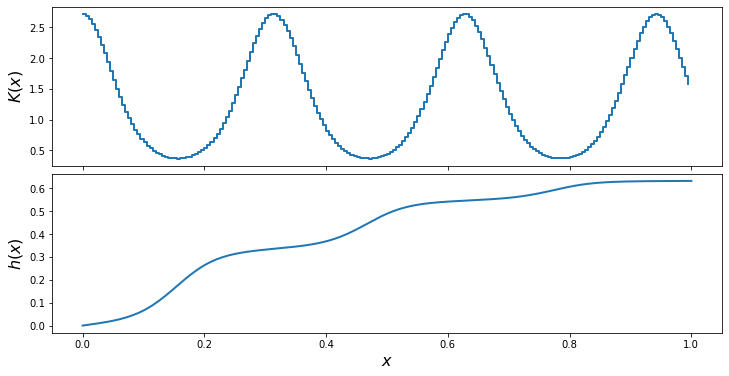

In [8]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(12,6))

axs[0].step(nodeXs[0:-1],K,linewidth=2,where='post')
axs[0].set_ylabel('$K(x)$',fontsize=16)

axs[1].plot(nodeXs,h,linewidth=2)
axs[1].set_ylabel('$h(x)$',fontsize=16)
axs[1].set_xlabel('$x$', fontsize=16)
plt.subplots_adjust(hspace=0.05)
plt.show()

## Check Gradient of Model

In [9]:
sens = objective.Gradient(0,0,[h],np.ones(1))

grad = mod.Gradient(0,0,[K],sens)
gradFD = mod.GradientByFD(0,0,[K],sens)

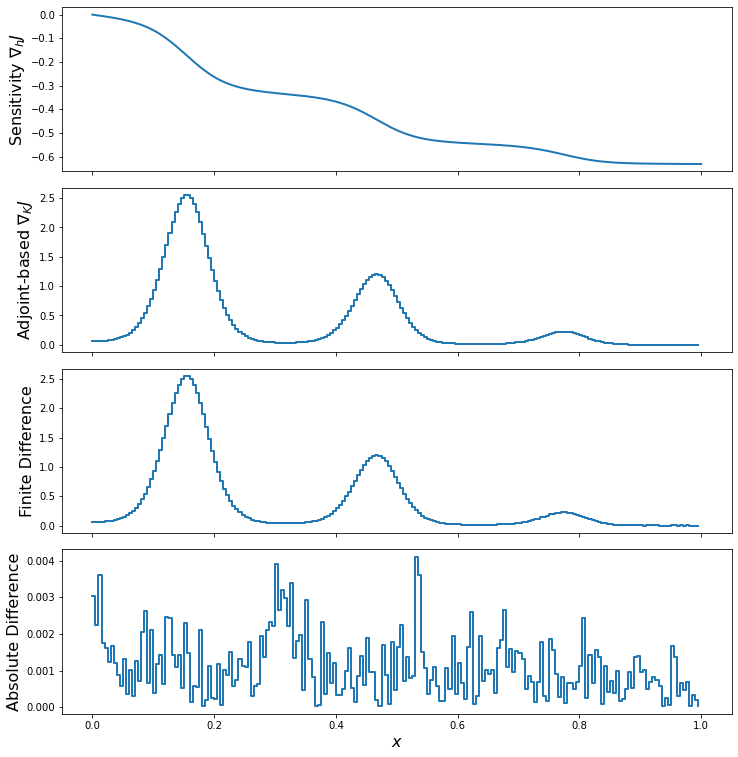

In [10]:
fig, axs = plt.subplots(nrows=4,sharex=True,figsize=(12,13))

axs[0].plot(nodeXs, sens, linewidth=2)
axs[0].set_ylabel('Sensitivity $\\nabla_h J$',fontsize=16)

axs[1].step(nodeXs[0:-1], grad, where='post',linewidth=2)
axs[1].set_ylabel('Adjoint-based $\\nabla_K J$',fontsize=16)

axs[2].step(nodeXs[0:-1], gradFD, where='post',linewidth=2)
axs[2].set_ylabel('Finite Difference',fontsize=16)

axs[3].step(nodeXs[0:-1], np.abs(grad-gradFD), where='post',linewidth=2)
axs[3].set_ylabel('Absolute Difference',fontsize=16)

axs[3].set_xlabel('$x$',fontsize=16)

plt.subplots_adjust(hspace=0.1)
plt.show()


## Test Hessian of Model

In [11]:
hessDir = np.random.rand(K.shape[0])

hessAct = mod.ApplyHessian(0,0,0,[K],sens,hessDir)
hessActFD = mod.ApplyHessianByFD(0,0,0,[K],sens,hessDir)

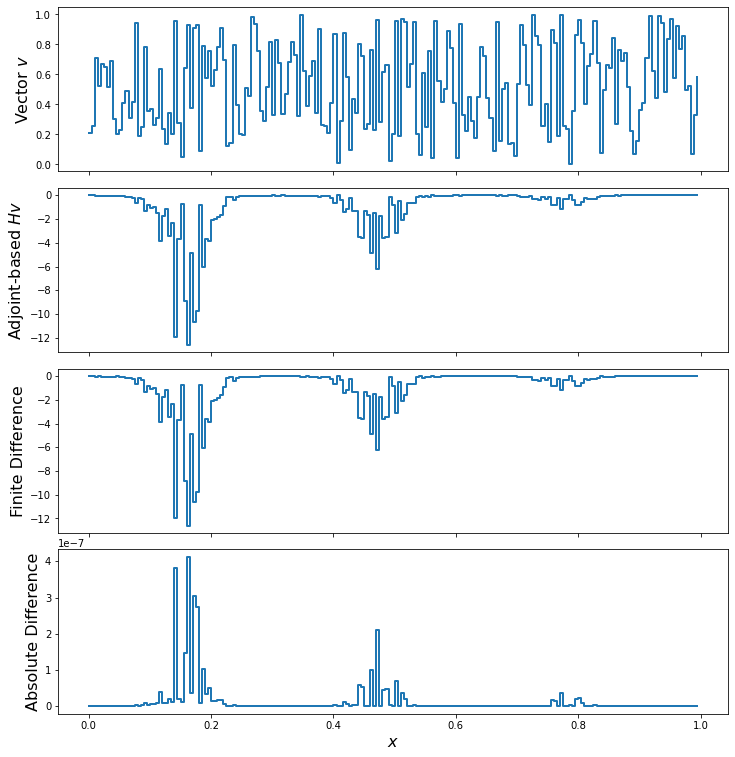

In [12]:
fig, axs = plt.subplots(nrows=4, figsize=(12,13), sharex=True)

axs[0].step(nodeXs[0:-1], hessDir, where='post', linewidth=2)
axs[0].set_ylabel('Vector $v$', fontsize=16)

axs[1].step(nodeXs[0:-1], hessAct, where='post', linewidth=2)
axs[1].set_ylabel('Adjoint-based $Hv$',fontsize=16)

axs[2].step(nodeXs[0:-1], hessActFD, where='post', linewidth=2)
axs[2].set_ylabel('Finite Difference',fontsize=16)

axs[3].step(nodeXs[0:-1], np.abs(hessAct-hessActFD), where='post', linewidth=2)
axs[3].set_ylabel('Absolute Difference',fontsize=16)
axs[3].set_xlabel('$x$', fontsize=16)

plt.subplots_adjust(hspace=0.1)
plt.show()

## Test Hessian of Objective

In [13]:
graph = mm.WorkGraph()
graph.AddNode(mod, 'Model')
graph.AddNode(objective, 'Objective')
graph.AddEdge('Model',0,'Objective',0)

fullMod = graph.CreateModPiece('Objective')

sens = np.ones(1)

hessAct = fullMod.ApplyHessian(0,0,0,[K],sens,hessDir)
hessActFD = fullMod.ApplyHessianByFD(0,0,0,[K],sens,hessDir)

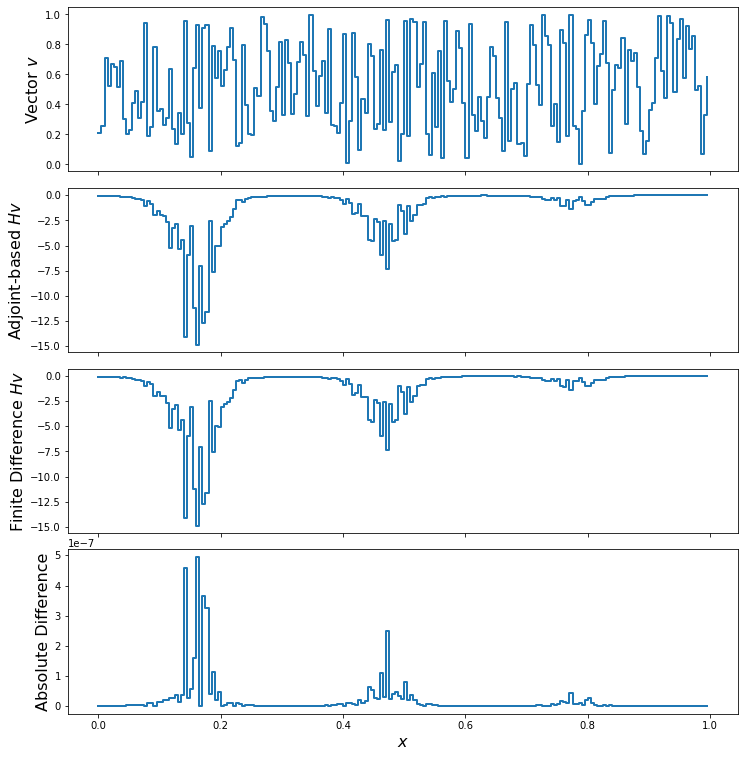

In [14]:
fig, axs = plt.subplots(nrows=4, figsize=(12,13), sharex=True)

axs[0].step(nodeXs[0:-1], hessDir, where='post', linewidth=2)
axs[0].set_ylabel('Vector $v$', fontsize=16)

axs[1].step(nodeXs[0:-1], hessAct, where='post', linewidth=2)
axs[1].set_ylabel('Adjoint-based $Hv$',fontsize=16)

axs[2].step(nodeXs[0:-1], hessActFD, where='post', linewidth=2)
axs[2].set_ylabel('Finite Difference $Hv$',fontsize=16)

axs[3].step(nodeXs[0:-1], np.abs(hessAct-hessActFD), where='post', linewidth=2)
axs[3].set_ylabel('Absolute Difference',fontsize=16)
axs[3].set_xlabel('$x$', fontsize=16)

plt.subplots_adjust(hspace=0.1)
plt.show()

## Hessian Spectrum

#### Define the linear operator

In [15]:
outWrt = 0 # There's only one output of "fullMod", so this is the only possibility
inWrt1 = 0 # There's also only one input of "fullMod"
inWrt2 = 0

scaling = -1.0
hessOp = mm.HessianOperator(fullMod, [K], outWrt, inWrt1, inWrt2, sens, scaling)

#### Set up the eigenvalue solver

In [16]:
opts = {
    'NumEigs' : numCells, # Maximum number of eigenvalue/eigenvector pairs to compute
    'Verbosity':3
}

solver = mm.StochasticEigenSolver(opts)
solver.compute(hessOp)

vals = solver.eigenvalues()
vecs = solver.eigenvectors()

Converged: All nonzero eigenvalues have been found (likely) or samples are degenerate (unlikely).
Converged: Reached maximum number of eigenvalues.


#### Plot the eigenvalue spectrum

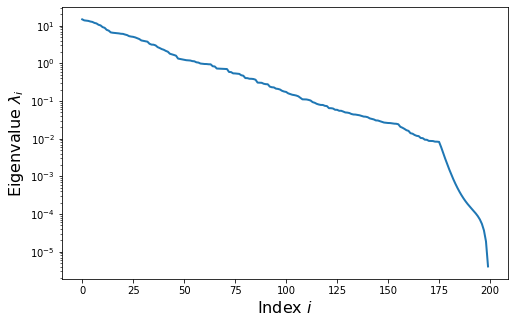

In [23]:
plt.figure(figsize=(8,5))
plt.semilogy(vals,linewidth=2)
plt.ylabel('Eigenvalue $\lambda_i$',fontsize=16)
plt.xlabel('Index $i$',fontsize=16)
plt.show()